<a href="https://colab.research.google.com/github/camila-almeida-da/AnaliseDeCenariosxlxs/blob/main/Analysis_of_Rounds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving 28.xlsx to 28.xlsx


In [ ]:
df = pd.read_excel('28.xlsx')

In [ ]:
#transforming the object in string
df['Different or not'] = df['Different or not'].astype('string')
#Convert an object to datetime
df['Counting completion time'] = pd.to_datetime(df['Counting completion time'])
df['decimal_hour'] = df['Counting completion time'].dt.hour + df['Counting completion time'].dt.minute / 60
df['decimal_hour'] = df['decimal_hour'].round(2)
#df['Hour'] = df['Counting completion time'].dt.hour
#df['Hour'].unique()
#Split the name counting operator
df['Name Operator'] = df['Counting operator'].str.split(' ').str[:2].str.join(' ')

In [ ]:
###Gruping by shifts
# Função para classificar os turnos
def classificar_turno(hora):
    if 22.60 <= hora or hora < 6:   # 22:36 até 6:00 → T3
        return 'T3'
    elif 6 <= hora <= 14.33:        # 6:00 até 14:20 → T1
        return 'T1'
    else:                           # 14:21 até 22:35 → T2
        return 'T2'

# Aplicando a função ao DataFrame
df['Shift'] = df['decimal_hour'].apply(classificar_turno)

In [ ]:
df['Qtd'] = 1
df['Different or not'].unique()

<StringArray>
['No', 'yes']
Length: 2, dtype: string

In [ ]:
df['Error or not'] = df['Different or not'].apply(lambda x: 0 if x == 'No' else 1)

In [ ]:
df.columns

Index(['Counting order No.', 'Counting task order number', 'location number',
       'Warehouse', 'ZONE', 'roadway', 'Counting detail status',
       'Counting order type', 'Counting mode', 'Counting Round',
       'Number of system sub-packages', 'Number of counting sub-packages',
       'Number of difference sub-packages', 'Different or not',
       'Difference percentage', 'Counting operator', 'Counting start time',
       'Counting completion time', 'Closed by', 'Close time',
       'Reason for closing', 'decimal_hour', 'Name Operator', 'Shift', 'Qtd',
       'Error or not'],
      dtype='object')

In [ ]:
df.drop(columns=['Counting order No.', 'Counting task order number', 'location number',
       'Warehouse', 'Counting detail status',
       'Counting order type', 'Counting mode', 'Closed by', 'Close time','Reason for closing'], inplace=True)

In [ ]:
df['assertion'] = np.where((df['Counting Round'] >= 2) & (df['Different or not'] == 'No'), 1, 0) #Assertividade na contagem considerando que não existe divergência na localização
df['%'] = df['assertion'] / df['Qtd']

In [ ]:
#filtered_df = df[(df['Hour'] >= 15) & (df['Hour'] <= 21)]

In [ ]:
#filtered_df['Hour'].unique()

**Back to the code**

In [ ]:
#Removing the first round and empty box in order to investigate counting errors
#df = df[(df['Counting Round'] != 1) ]
#df = df[(df['Counting Round'] != 0) ]

#Checking If we removing the zero and one round
#df['Counting Round'].unique()

In [ ]:
## After investigate we left of 50k line for 1K line
#perc_mistakes = [(3367/92268) * 100]
#perc_mistakes

In [ ]:
## Removing line with a difference

#df = df[df['Different or not'] != 'yes']

# **AVG OF ROUNDS PER SHIFT**




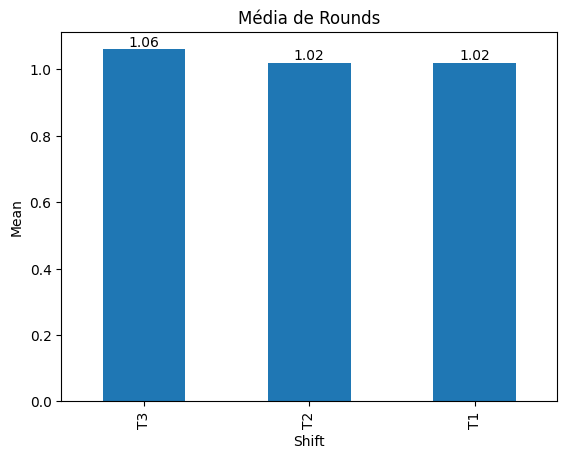

In [ ]:
##Mean of freq of rounds within de one and zero rounds(empty box)

df_freq = df.groupby('Shift')['Counting Round'].mean().sort_values(ascending=False).round(2)

# Adicionar a linha da média
#plt.axhline(y=media, color='r', linestyle='--', label=f'Média: {media:.2f}')

#Code of visualization

df_freq.plot(kind='bar')
plt.title('Média de Rounds')
plt.xlabel('Shift')
plt.ylabel('Mean')

for i, v in enumerate(df_freq):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# **FREQUENCY OF ROUNDS**

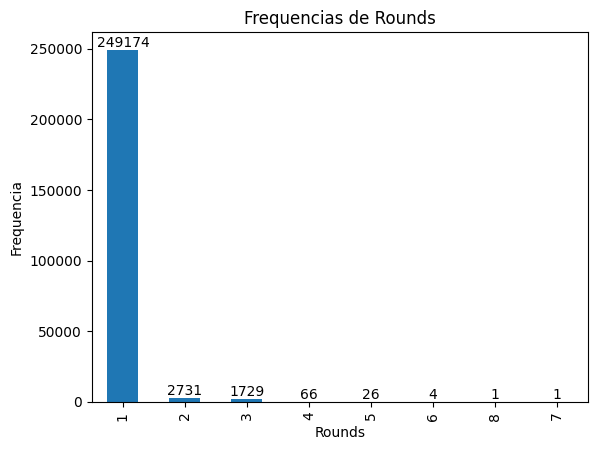

In [ ]:
#Frequency of rounds disregarding

frequencia = df['Counting Round'].value_counts()

# Adicionar a linha da média
#plt.axhline(y=median, color='r', linestyle='--', label=f'Média: {median:.2f}')

frequencia.plot(kind='bar')
plt.title('Frequencias de Rounds')
plt.xlabel('Rounds')
plt.ylabel('Frequencia')

for i, v in enumerate(frequencia):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [ ]:
df.shape

(253732, 18)

In [ ]:
rouds2 = (1 - (249/253.7))##apenas 0,02 posições foram contadas em mais de 1 round
qtd_pos_2 = 253732*0.0179 #Localizações contaddas em mais de um round
qtd_err = qtd_pos_2 - len(df[(df['Different or not'] == "yes")])
perc_without_div = qtd_err/253732

In [ ]:
 ## Colaboradores que biparam mais de duas vezes sem haver divergência
 df_errors = (df[df['assertion'] == 1])

# **LOCALIZAÇÕES SEM DIVERGÊNCIA COM MAIS DE DOIS ROUNDS**

In [ ]:
df_error = df.groupby(['Name Operator','Shift'])['%'].mean().sort_values(ascending=False).round(2).head(10)
df_error

,,%
Name Operator,Shift,
ADRIANA FERNANDES(60047306),T3,0.03
MÁRCIA ARAÚJO,T3,0.03
RENAN MENDONÇA(60047422),T3,0.02
LUANA DE,T3,0.02
EVILEN EVILEN,T3,0.02
NATHALIA ASATO(60045774),T3,0.02
MIRIÃ ROSA(60037686),T3,0.02
LUCAS LIMA(60037609),T3,0.02
VITORIA SANTOS(60037885),T3,0.01


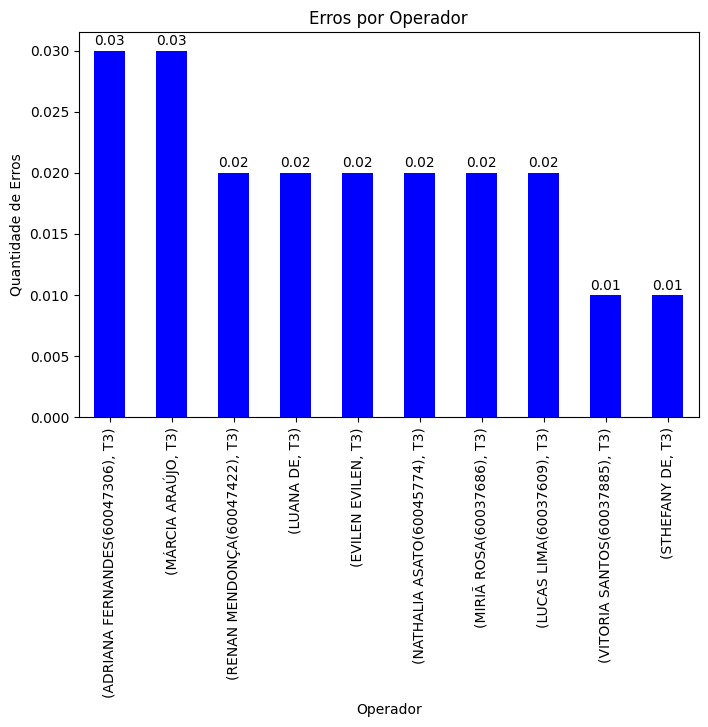

In [ ]:
# Criando o gráfico de barras
# Criando o gráfico de barras
plt.figure(figsize=(8, 5))
bars = df_error.plot(kind='bar', color='blue')

# Adicionando rótulos manualmente nas barras (ajustando a posição)
for idx, value in enumerate(df_error):
    plt.text(idx, value + 0.0002, str(value), ha='center', va='bottom')  # Ajuste o valor de 'value + 0.2' para ajustar a altura

# Personalizando o gráfico
plt.xlabel('Operador')
plt.ylabel('Quantidade de Erros')
plt.title('Erros por Operador')

plt.show()

In [ ]:
# Definindo o número que você quer contar (ex: o número 2)
numero_especifico = "RENAN MENDONÇA(60047422)"

# Contando quantas vezes o número aparece no DataFrame
contagem = df.apply(lambda x: (x == numero_especifico).sum()).sum()

print(f'O número {numero_especifico} aparece {contagem} vezes no DataFrame.')

O número RENAN MENDONÇA(60047422) aparece 3056 vezes no DataFrame.


In [ ]:
df['Qtd'].sum()

np.int64(253590)

In [ ]:
df.shape

(253590, 18)

In [ ]:
df_mean = df.groupby(['Name Operator','Shift'])['Qtd'].count().sort_values(ascending=False).round(2).head(10)
df_mean

,,Qtd
Name Operator,Shift,
GABRIEL OLIVEIRA,T1,16798
HEVELLYN MIRANDA(60044196),T1,13820
TALITA BARBOSA(60044246),T1,13385
JOSÉ MARCOS,T1,13322
RAYSSA CASTELO,T2,11592
EVILLA ABIGAIL,T2,11320
VIVIAN BONFIM,T2,11159
ROSANGELA SILVA(60037768),T1,9903
JOSE ANTONIO,T1,9514


In [ ]:
df_mean.mean()

np.float64(11991.3)

In [ ]:
contagem = df['Name Operator'].value_counts()
contagem[30:]

,count
Name Operator,
LUCAS LIMA(60037609),2799
GABRIEL SANTOS(60036147),2764
VITORIA SANTOS(60037885),2537
MELISSA DE,2216
GRAZIELLY RENATA,2091
MÁRCIA ARAÚJO,2064
ABINOA MILANE,2040
JANAINA MARASCO(60051498),1917
SUSANA PEREIRA,1880


In [ ]:
exclude = ['Vitor Rocha(10066772)', "RODRIGO ROSA"]
df = df[~df['Name Operator'].isin(exclude)]

In [ ]:
contagem = df['Name Operator'].value_counts(30)
média = contagem.mean()
print(f'Média de contagem por colaborador: {média}')

Média de contagem por colaborador: 0.01923076923076923


In [ ]:
#Validation of what can be round zero
#df_zero = df[df['Counting Round'] == 0]
#df_zero.loc[:,['Counting Round', 'Number of system sub-packages', 'Number of counting sub-packages',
       #'Number of difference sub-packages', 'Different or not' ]]

In [ ]:
# Salvando como CSV
#merged.to_csv('arquivo.csv', index=False)

# Baixar o arquivo direto no Colab
#from google.colab import files
#files.download('arquivo.csv')

In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#df = pd.read_csv('arquivo.csv')

In [ ]:
#df.head()

# **FRENQUENCY OF ROUND PER SHIFT**



[Text(0, 0, '249174'),
 Text(0, 0, '2731'),
 Text(0, 0, '1729'),
 Text(0, 0, '66'),
 Text(0, 0, '26'),
 Text(0, 0, '4'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

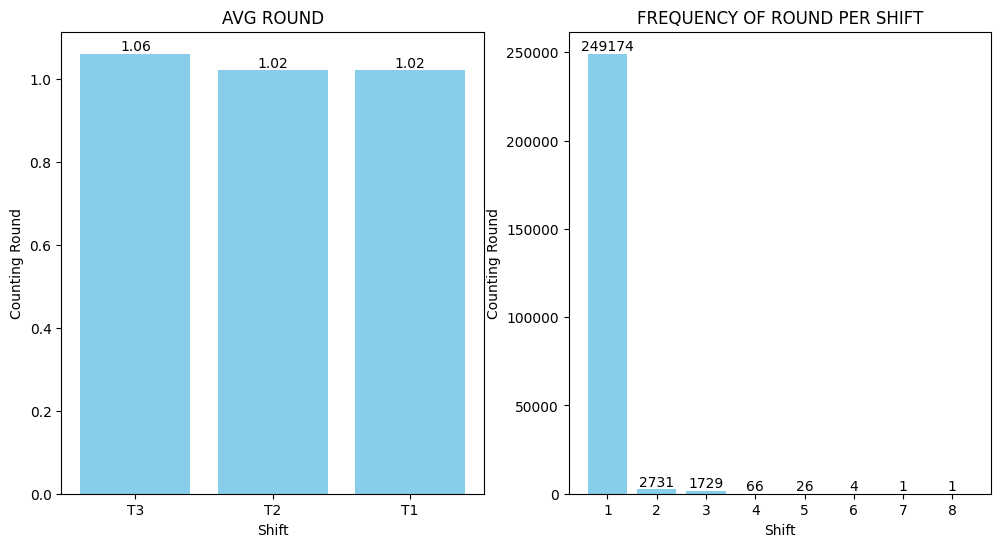

In [ ]:
# @title
# Criando os subgráficos lado a lado
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 linha, 2 colunas

# Gráfico 1: avg of rounfs
bars_a = ax[0].bar(df_freq.index,df_freq, color='skyblue')
ax[0].set_title('AVG ROUND')
ax[0].set_xlabel('Shift')
ax[0].set_ylabel('Counting Round')

#Rótlos ax[0]

ax[0].bar_label(bars_a)

# Gráfico 2: Frequency of round per shift
bars_b = ax[1].bar(frequencia.index,frequencia, color='skyblue')
ax[1].set_title('FREQUENCY OF ROUND PER SHIFT')
ax[1].set_xlabel('Shift')
ax[1].set_ylabel('Counting Round')

#Rótulos ax [1]

ax[1].bar_label(bars_b)



In [ ]:
# @title
print(f"Das 259k posições bipadas apenas {rouds2} posições foram acima de dois rounds totalizando {qtd_pos_2} localizações, sendo destas {qtd_err} localizações sem divergência com mais de dois rounds, ou seja apenas {perc_without_div} são erros operacionais!")

Das 259k posições bipadas apenas 0.01852581789515173 posições foram acima de dois rounds totalizando 4541.8027999999995 localizações, sendo destas 1610.8027999999995 localizações sem divergência com mais de dois rounds, ou seja apenas 0.006348441662856871 são erros operacionais!


## **LOCALIZAÇÕES SEM DIVERGÊNCIA COM MAIS DE DOIS ROUNDS**

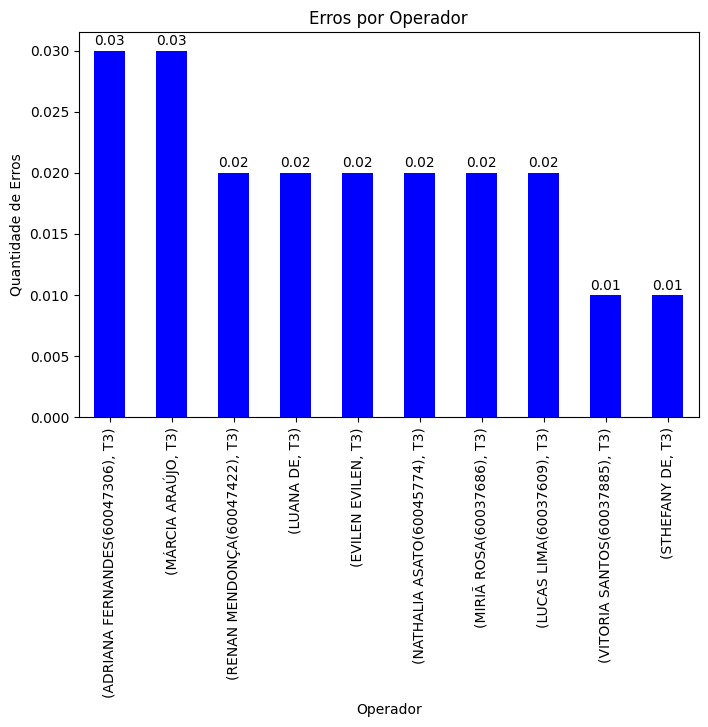

In [ ]:
# @title
# Criando o gráfico de barras
# Criando o gráfico de barras
plt.figure(figsize=(8, 5))
bars = df_error.plot(kind='bar', color='blue')

# Adicionando rótulos manualmente nas barras (ajustando a posição)
for idx, value in enumerate(df_error):
    plt.text(idx, value + 0.0002, str(value), ha='center', va='bottom')  # Ajuste o valor de 'value + 0.2' para ajustar a altura

# Personalizando o gráfico
plt.xlabel('Operador')
plt.ylabel('Quantidade de Erros')
plt.title('PERCENTUAL DE ERROS POR OPERADOR')

plt.show()

# **PRODUCTIVITY TOP 10**

In [ ]:
# @title
df_mean df.groupby(['Name Operator','Shift'])['Qtd'].count().sort_values(ascending=False).round(2).head(10)
df_mean

,,Qtd
Name Operator,Shift,
GABRIEL OLIVEIRA,T1,16798
HEVELLYN MIRANDA(60044196),T1,13820
TALITA BARBOSA(60044246),T1,13385
JOSÉ MARCOS,T1,13322
RAYSSA CASTELO,T2,11592
EVILLA ABIGAIL,T2,11320
VIVIAN BONFIM,T2,11159
ROSANGELA SILVA(60037768),T1,9903
JOSE ANTONIO,T1,9514


In [ ]:
# @title
df_avg = df_mean.mean()

In [ ]:
# @title
print(f'Média de contagem por colaborador: {df_avg}')

Média de contagem por colaborador: 11991.3
